In [ ]:
from dotenv import load_dotenv

load_dotenv('.env') #replace this with your env file

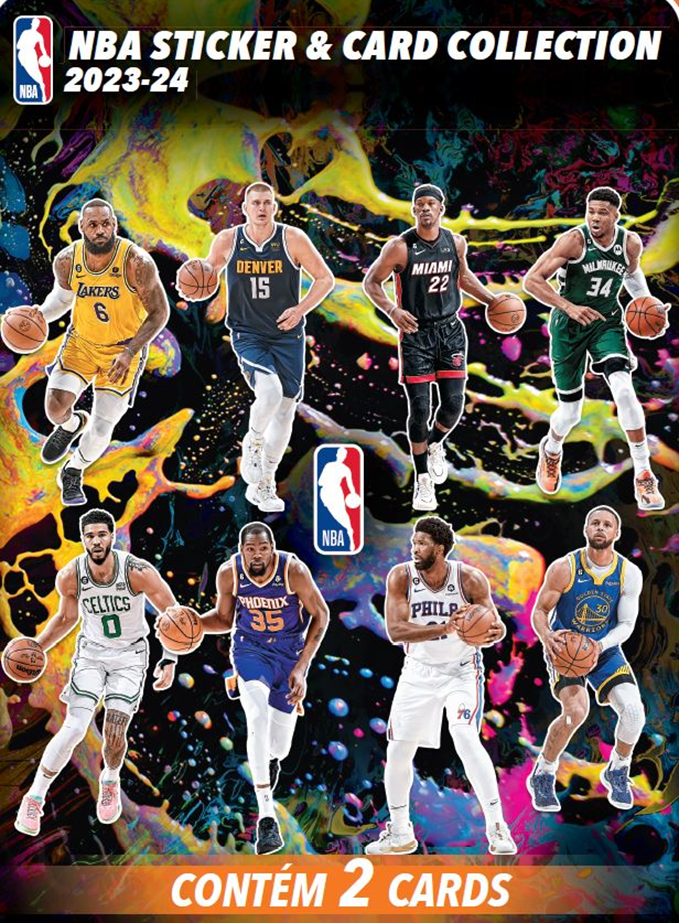

In [67]:
#Display image in notebook
from IPython.display import Image

sample_image = 'images/nba_image.png'
Image(filename=sample_image)

In [68]:
# Create request json
import base64
import json

def read_image(image_path):
    with open(image_path, "rb") as f:
        return f.read()


request_json = {
    "input_data": {
        "columns": ["image"],
        "data": [base64.encodebytes(read_image(sample_image)).decode("utf-8")],
    }
}

body = str.encode(json.dumps(request_json))


In [69]:
import urllib.request
import os


# Make sure you have the AutoML Image Segmentation model deployed to an endpoint in Azure Machine Learning 
url = 'https://segmentation.eastus.inference.ml.azure.com/score'
# Replace this with the primary/secondary key, AMLToken, or Microsoft Entra ID token for the endpoint
api_key = os.getenv("AML_API_KEY")
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")

# The azureml-model-deployment header will force the request to go to a specific deployment.
# Remove this header to have the request observe the endpoint traffic rules
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key), 'azureml-model-deployment': 'automl-image-instance-segment-4' }

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))


b'[{"boxes": [{"box": {"topX": 0.5351277949365417, "topY": 0.19457075720877415, "bottomX": 0.7493120367744838, "bottomY": 0.5564183267630233}, "label": "person\\n", "score": 0.9991173148155212, "polygon": [[0.6295369211514393, 0.5547378104875805, 0.6170212765957447, 0.5538178472861086, 0.6120150187734669, 0.5482980680772769, 0.6107634543178974, 0.5133394664213431, 0.6007509386733417, 0.47286108555657774, 0.5982478097622027, 0.43790248390064396, 0.5894868585732165, 0.40110395584176634, 0.5857321652065082, 0.36798528058877644, 0.5757196495619524, 0.3532658693652254, 0.5632040050062578, 0.34314627414903404, 0.5506883604505632, 0.3265869365225391, 0.5444305381727159, 0.32106715731370744, 0.541927409261577, 0.3173873045078197, 0.5394242803504381, 0.30358785648574055, 0.5431789737171464, 0.28978840846366144, 0.5669586983729662, 0.2621895124195032, 0.5819774718397998, 0.25574977000919963, 0.6032540675844806, 0.24195032198712052, 0.6082603254067585, 0.2281508739650414, 0.609511889862328, 0.211

In [38]:
json.loads(result)[0]['boxes'][0]

{'box': {'topX': 0.5798380567790867,
  'topY': 0.19355772016045447,
  'bottomX': 0.8648202115043786,
  'bottomY': 0.9928293240085263},
 'label': 'person\n',
 'score': 0.9991044402122498,
 'polygon': [[0.6563803169307757,
   0.9887359198998749,
   0.6472060050041701,
   0.983729662077597,
   0.6430358632193495,
   0.9762202753441802,
   0.6388657214345288,
   0.9549436795994993,
   0.6388657214345288,
   0.8936170212765957,
   0.6363636363636364,
   0.8773466833541927,
   0.6263552960800667,
   0.8448060075093867,
   0.6188490408673895,
   0.8272841051314143,
   0.6146788990825688,
   0.8097622027534418,
   0.6138448707256047,
   0.7509386733416771,
   0.6080066722268557,
   0.6595744680851063,
   0.5996663886572143,
   0.5819774718397998,
   0.5929941618015012,
   0.5481852315394243,
   0.591326105087573,
   0.5256570713391739,
   0.5938281901584654,
   0.5031289111389237,
   0.5979983319432861,
   0.48685857321652065,
   0.6080066722268557,
   0.4693366708385482,
   0.6138448707256047

person
: [363.352, 179.589, 145.431, 333.985], 0.999
person
: [12.969, 496.506, 180.018, 349.27], 0.999
person
: [193.734, 511.793, 134.328, 344.445], 0.998
person
: [362.795, 512.659, 153.83, 350.233], 0.998
person
: [522.349, 180.439, 146.755, 328.731], 0.997
person
: [191.689, 174.995, 142.893, 356.632], 0.997
person
: [526.902, 501.4, 127.524, 315.142], 0.994
person
: [23.651, 198.033, 154.03, 309.847], 0.994
baseballglove
: [154.52, 604.706, 49.954, 48.066], 0.916
baseballglove
: [623.032, 296.309, 46.551, 43.721], 0.902
baseballglove
: [446.602, 601.522, 52.217, 43.302], 0.855
sportsball
: [2.463, 306.135, 44.043, 47.203], 0.726


<Figure size 1800x1200 with 0 Axes>

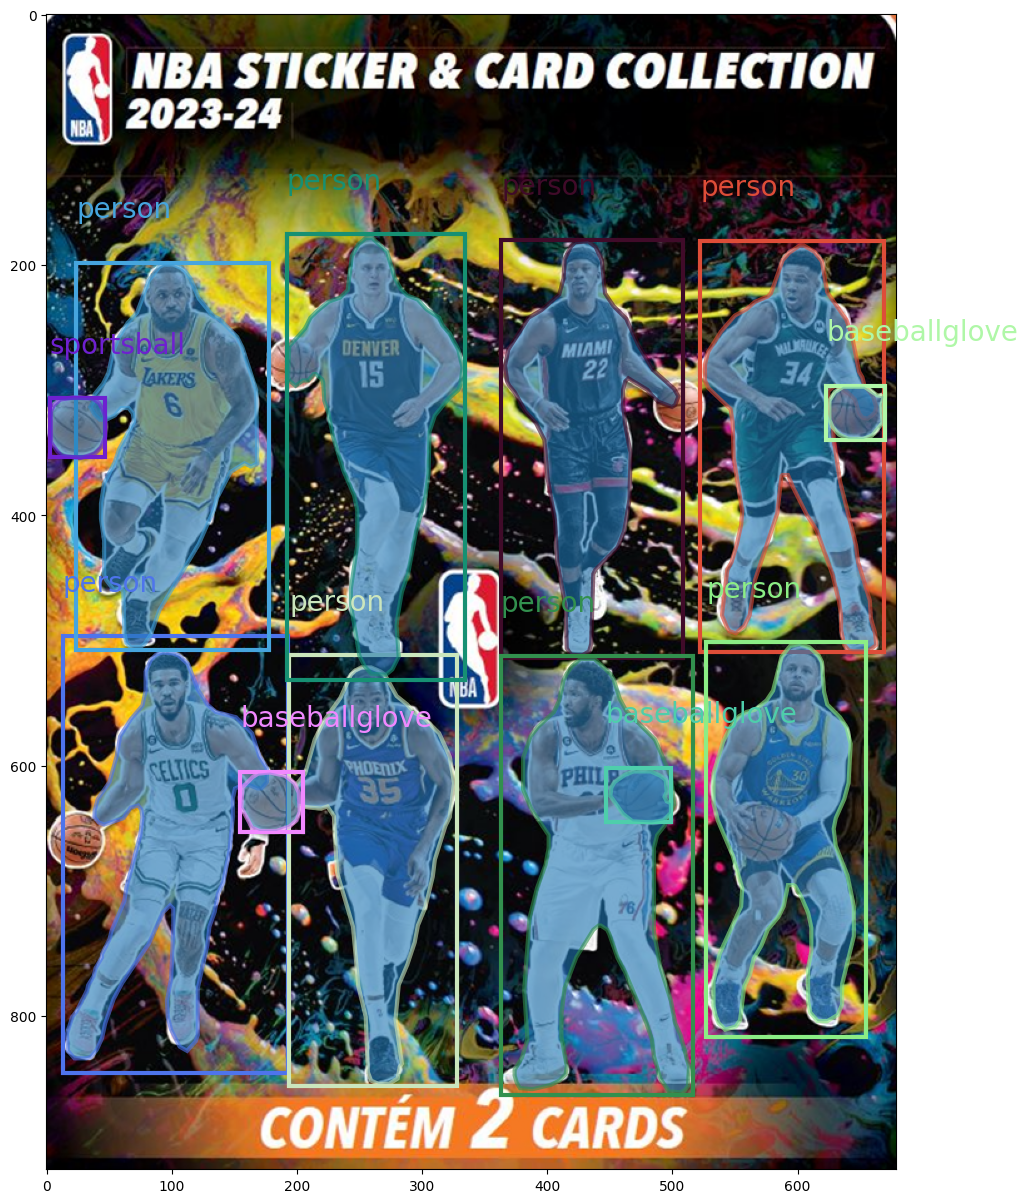

In [70]:
%matplotlib inline

#plot the image with the detected objects and segmentation masks

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import json

IMAGE_SIZE = (18, 12)
plt.figure(figsize=IMAGE_SIZE)
img_np = mpimg.imread(sample_image)
img = Image.fromarray(img_np.astype("uint8"), "RGB")
x, y = img.size

fig, ax = plt.subplots(1, figsize=(15, 15))
# Display the image
ax.imshow(img_np)

# draw box and label for each detection
detections = json.loads(result)
for detect in detections[0]["boxes"]:
    label = detect["label"]
    box = detect["box"]
    conf_score = detect["score"]
    if conf_score > 0.6:
        ymin, xmin, ymax, xmax = (
            box["topY"],
            box["topX"],
            box["bottomY"],
            box["bottomX"],
        )
        topleft_x, topleft_y = x * xmin, y * ymin
        width, height = x * (xmax - xmin), y * (ymax - ymin)

        color = np.random.rand(3)  #'red'
        rect = patches.Rectangle(
            (topleft_x, topleft_y),
            width,
            height,
            linewidth=3,
            edgecolor=color,
            facecolor="none",
        )
        ax.add_patch(rect)
        plt.text(topleft_x, topleft_y - 10, label, color=color, fontsize=20)
        # Add polygons  
        if 'polygon' in detect:  
            polygon = detect['polygon'][0]
            # Reshape the list of coordinates into pairs of (x, y)  
            polygon = [(polygon[i], polygon[i+1]) for i in range(0, len(polygon), 2)]  
            # Scale the polygon coordinates  
            polygon = [(p[0] * x, p[1] * y) for p in polygon]  
            poly_patch = patches.Polygon(polygon, fill=True, alpha=0.6, edgecolor=color, linewidth=3)  
            ax.add_patch(poly_patch)  
plt.show()

In [72]:
from PIL import Image, ImageDraw  

# Crop the detected objects from the image and create new images

# Load image:  
img = Image.open(sample_image)  
img = img.convert("RGBA")
x, y = img.size


for i,detect in enumerate(detections[0]["boxes"]):
    conf_score = detect["score"]
    if conf_score > 0.6:
        if 'polygon' in detect and 'person' in detect['label']:  
            polygon = detect['polygon'][0]
                # Reshape the list of coordinates into pairs of (x, y)  
            polygon = [(polygon[i], polygon[i+1]) for i in range(0, len(polygon), 2)]  
                # Scale the polygon coordinates  
            polygon = [(p[0] * x, p[1] * y) for p in polygon]  
        
            # Calculate the bounding box of the polygon  
            minx = min(x for x, y in polygon)  
            miny = min(y for x, y in polygon)  
            maxx = max(x for x, y in polygon)  
            maxy = max(y for x, y in polygon)  
            bbox = (minx, miny, maxx, maxy)  
            
            # Crop the image and polygon to the bounding box  
            img_cropped = img.crop(bbox)  
            polygon_cropped = [(x - bbox[0], y - bbox[1]) for x, y in polygon]  
            
            # Create a white image of the same size as the cropped image  
            white_img = Image.new('RGBA', img_cropped.size, 'WHITE')   
            
            # Create a mask using the cropped polygon  
            mask = Image.new('L', img_cropped.size)  
            draw = ImageDraw.Draw(mask)  
            draw.polygon(polygon_cropped, fill=255)  
            
            # Convert the mask to an alpha mask  
            alpha_mask = mask.convert('1')  
            
            # Paste the cropped image onto the white image using the alpha mask  
            white_img.paste(img_cropped, mask=alpha_mask)  
            
            # Save the image  
            white_img.save(f'extracted_images/nba_image_cropped_{i}.png')  

